In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Review the stats for premier league from 2006 - 2018 and see how Manchester United have progressed in that period as well as seeing how they compare to the other top teams

In [316]:
stats= pd.read_csv("stats.csv")

In [317]:
stats

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


In [318]:
stats.isna().sum()

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

In [319]:
#80 missing for backward pass and big chance missed so it makes sense to drop these columns
stats = stats.loc[ : , (stats.columns != "backward_pass" ) &(stats.columns != 'big_chance_missed')]

In [320]:
stats.isna().sum()

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
total_cross              0
corner_taken             0
touches                  0
clearance_off_line       0
dispossessed            20
penalty_save             0
t

In [321]:
#Now we are left with 20 values missing on 4 different columns. Doesn't even equate to 10% so we will clean rather than drop this data.

In [322]:
stats = stats.fillna(stats.mean())
stats.isna().sum()

C:\Users\Karls\AppData\Local\Temp/ipykernel_12292/3822387233.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = stats.fillna(stats.mean())


team                    0
wins                    0
losses                  0
goals                   0
total_yel_card          0
total_red_card          0
total_scoring_att       0
ontarget_scoring_att    0
hit_woodwork            0
att_hd_goal             0
att_pen_goal            0
att_freekick_goal       0
att_ibox_goal           0
att_obox_goal           0
goal_fastbreak          0
total_offside           0
clean_sheet             0
goals_conceded          0
saves                   0
outfielder_block        0
interception            0
total_tackle            0
last_man_tackle         0
total_clearance         0
head_clearance          0
own_goals               0
penalty_conceded        0
pen_goals_conceded      0
total_pass              0
total_through_ball      0
total_long_balls        0
total_cross             0
corner_taken            0
touches                 0
clearance_off_line      0
dispossessed            0
penalty_save            0
total_high_claim        0
punches     

In [323]:
#There is no draw column or points column - We can work this out based on the win losses however as we know there's 38 games a season
stats['draws'] = 38 - stats['wins'] - stats['losses']
stats['points'] = stats['wins'] * 3 + stats['draws']
stats

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,corner_taken,touches,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season,draws,points
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,258.0,25686.0,1.0,472.968182,2.0,37.0,25.0,2006-2007,5.0,89.0
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,231.0,24010.0,2.0,472.968182,1.0,74.0,22.0,2006-2007,11.0,83.0
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,282.0,24150.0,1.0,472.968182,0.0,51.0,27.0,2006-2007,8.0,68.0
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,278.0,25592.0,1.0,472.968182,0.0,88.0,27.0,2006-2007,11.0,68.0
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,181.0,22200.0,2.0,472.968182,0.0,51.0,24.0,2006-2007,9.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,165.0,22619.0,6.0,416.000000,2.0,31.0,24.0,2017-2018,10.0,37.0
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,150.0,22775.0,1.0,439.000000,3.0,44.0,15.0,2017-2018,9.0,33.0
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,227.0,24639.0,4.0,379.000000,1.0,29.0,13.0,2017-2018,15.0,36.0
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,136.0,20368.0,3.0,402.000000,0.0,27.0,14.0,2017-2018,12.0,33.0


In [324]:
ManU = stats.loc[stats["team"] == "Manchester United"]
ManUprogress = ManU[['season',"team", "points","goals"]]
ManUprogress

,season,team,points,goals
0,2006-2007,Manchester United,89.0,83.0
20,2007-2008,Manchester United,87.0,80.0
40,2008-2009,Manchester United,90.0,68.0
61,2009-2010,Manchester United,85.0,86.0
80,2010-2011,Manchester United,80.0,78.0
101,2011-2012,Manchester United,89.0,89.0
120,2012-2013,Manchester United,89.0,86.0
146,2013-2014,Manchester United,64.0,64.0
163,2014-2015,Manchester United,70.0,62.0
183,2015-2016,Manchester United,66.0,49.0


Text(0.5, 1.0, 'Manchester United Progress')

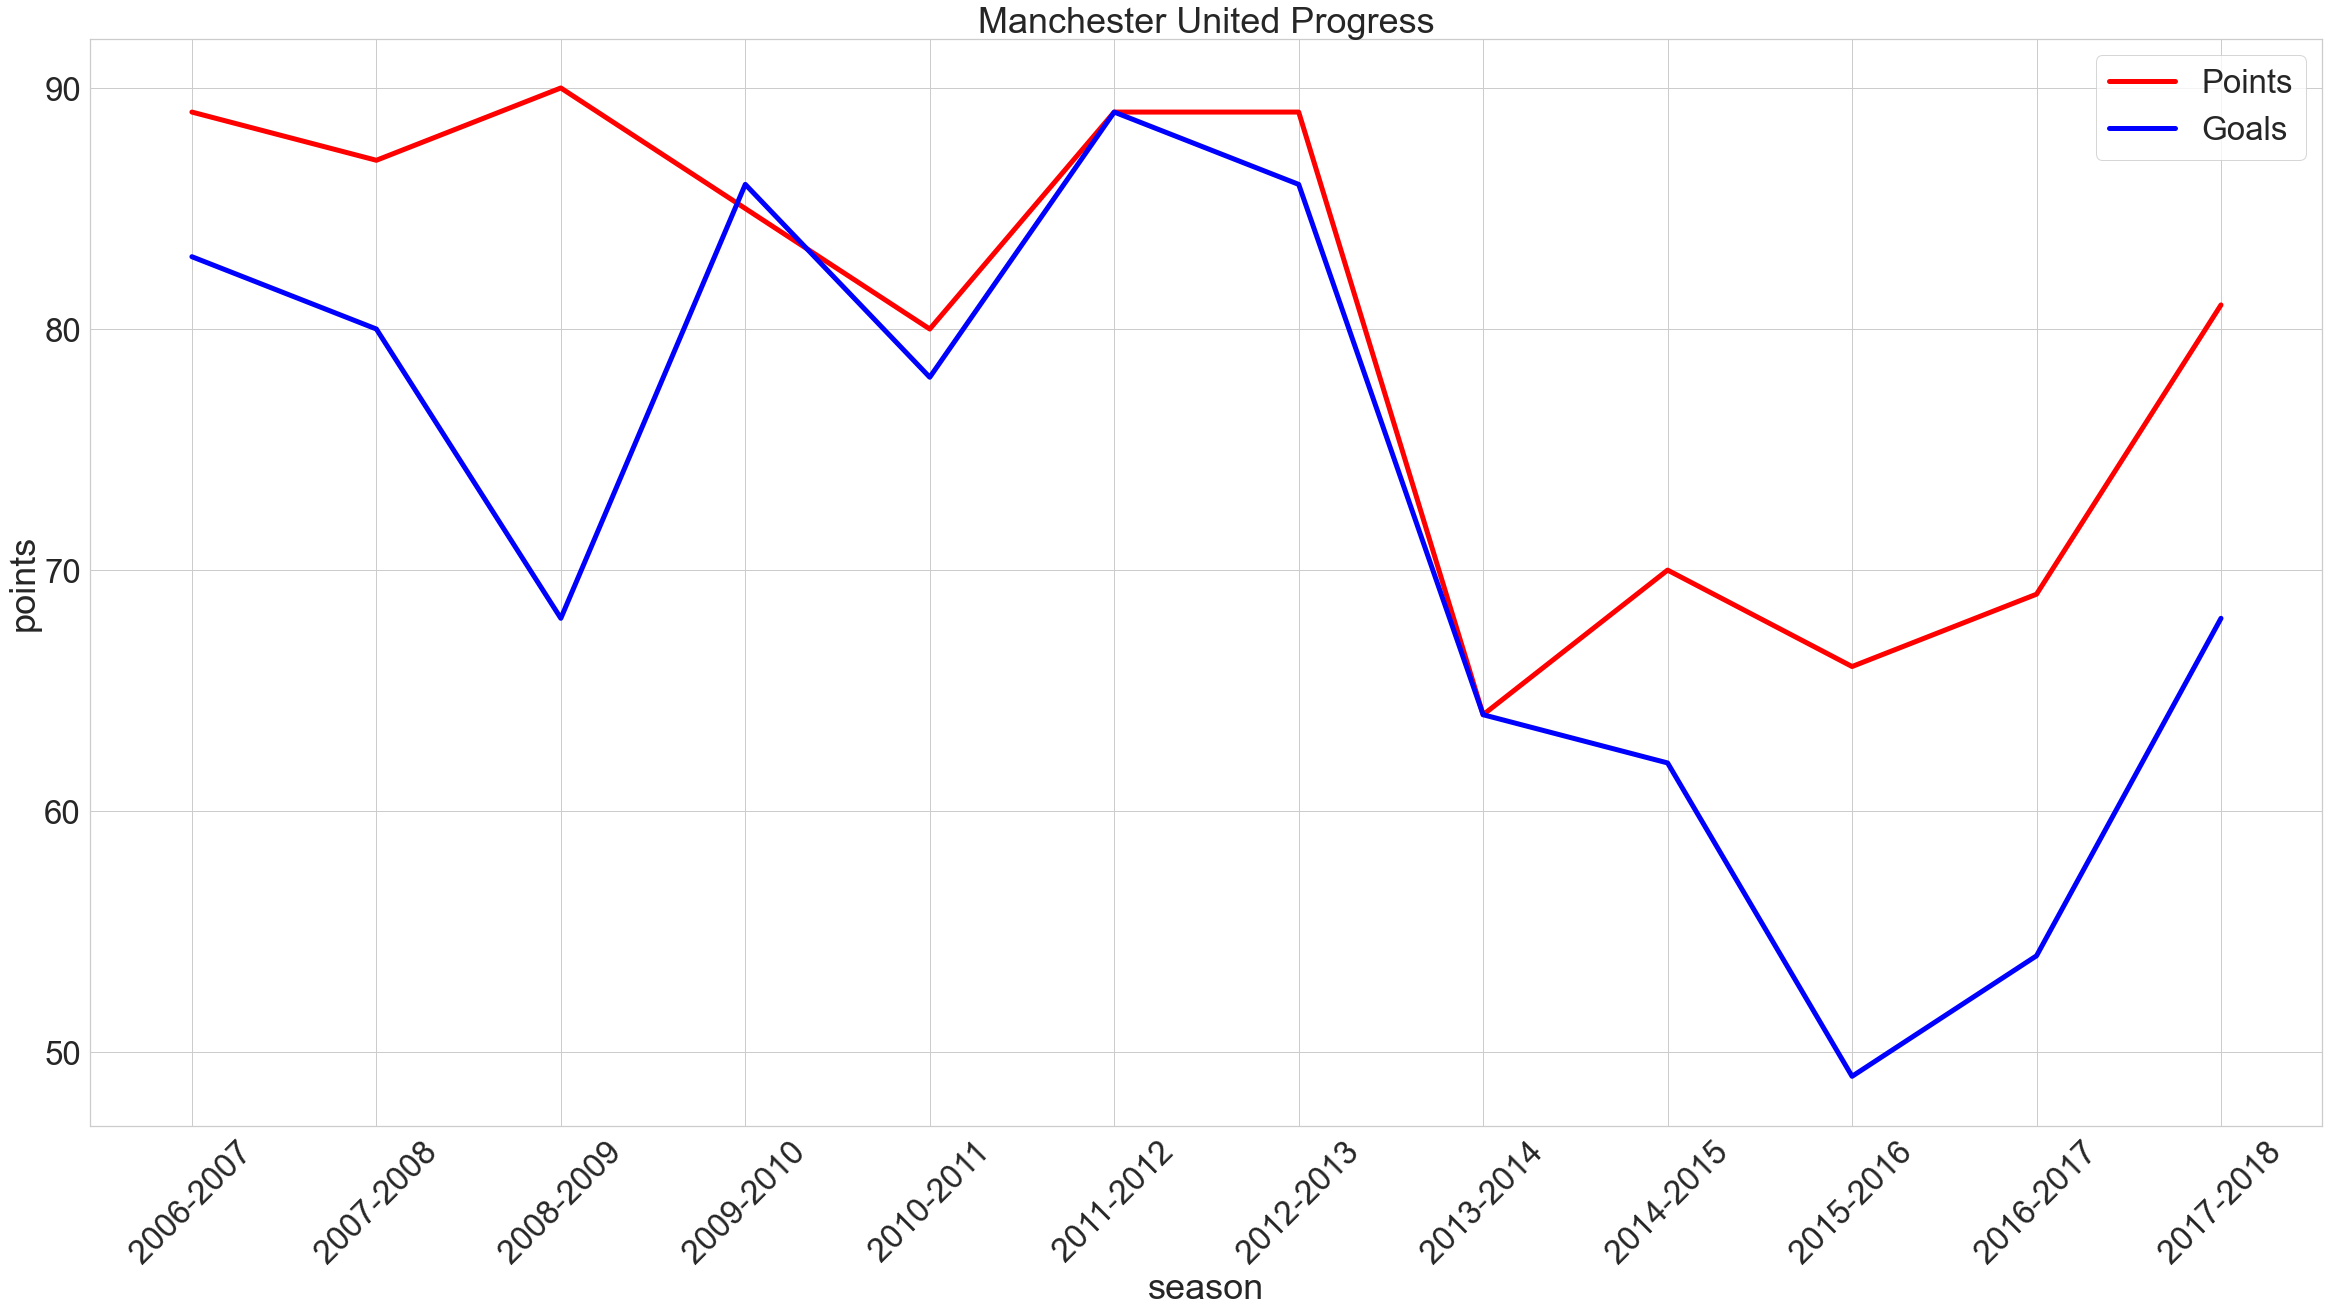

In [325]:
sns.set_style('whitegrid')
sns.lineplot(x='season', y='points',linewidth=5, color="red",data = ManUprogress, label = 'Points')
sns.lineplot(x='season', y='goals',linewidth=5, color="blue",data = ManUprogress,label = "Goals")
sns.set(font_scale=3)
plt.xticks(rotation=45)
plt.title("Manchester United Progress")

#From the below it's clear that there was a significant drop off in the performance after 2013
#Went on an upward trajectory from 2015-2018 however
#Very high performance from 2006 - 2013 so it will be interestng to see how these points average out compared to other teams
#There appears to be a correlation with number of goals scored being converted to points however 2008-09 and 2015-2016 are outliers here with the number of goals being significantly less than points

In [326]:
# Workout the average point return and return the top 10 teams over the period of 2007 - 2018 
stats = stats[["team","points", "wins","draws", "losses", "goals", "season"]]
averages = stats.groupby("team").mean()
top10 = averages.sort_values(["points","wins", "goals"], ascending = False)

In [327]:
top5 = top10[0:5][['points', 'goals', 'wins', 'draws','losses', ]]
top5.style.format({"points" : '{:.4}', "wins" : '{:.4}', "draws" : '{:.4}', "losses" : '{:.4}', "goals" : '{:.4}' })


,points,goals,wins,draws,losses
team,,,,,
Manchester United,79.92,72.25,24.17,7.417,6.417
Chelsea,77.42,71.58,23.0,8.417,6.583
Arsenal,72.67,71.75,21.25,8.917,7.833
Manchester City,71.75,72.17,21.33,7.75,8.917
Liverpool,68.42,68.08,19.5,9.917,8.583


In [328]:
top5 = top5.T

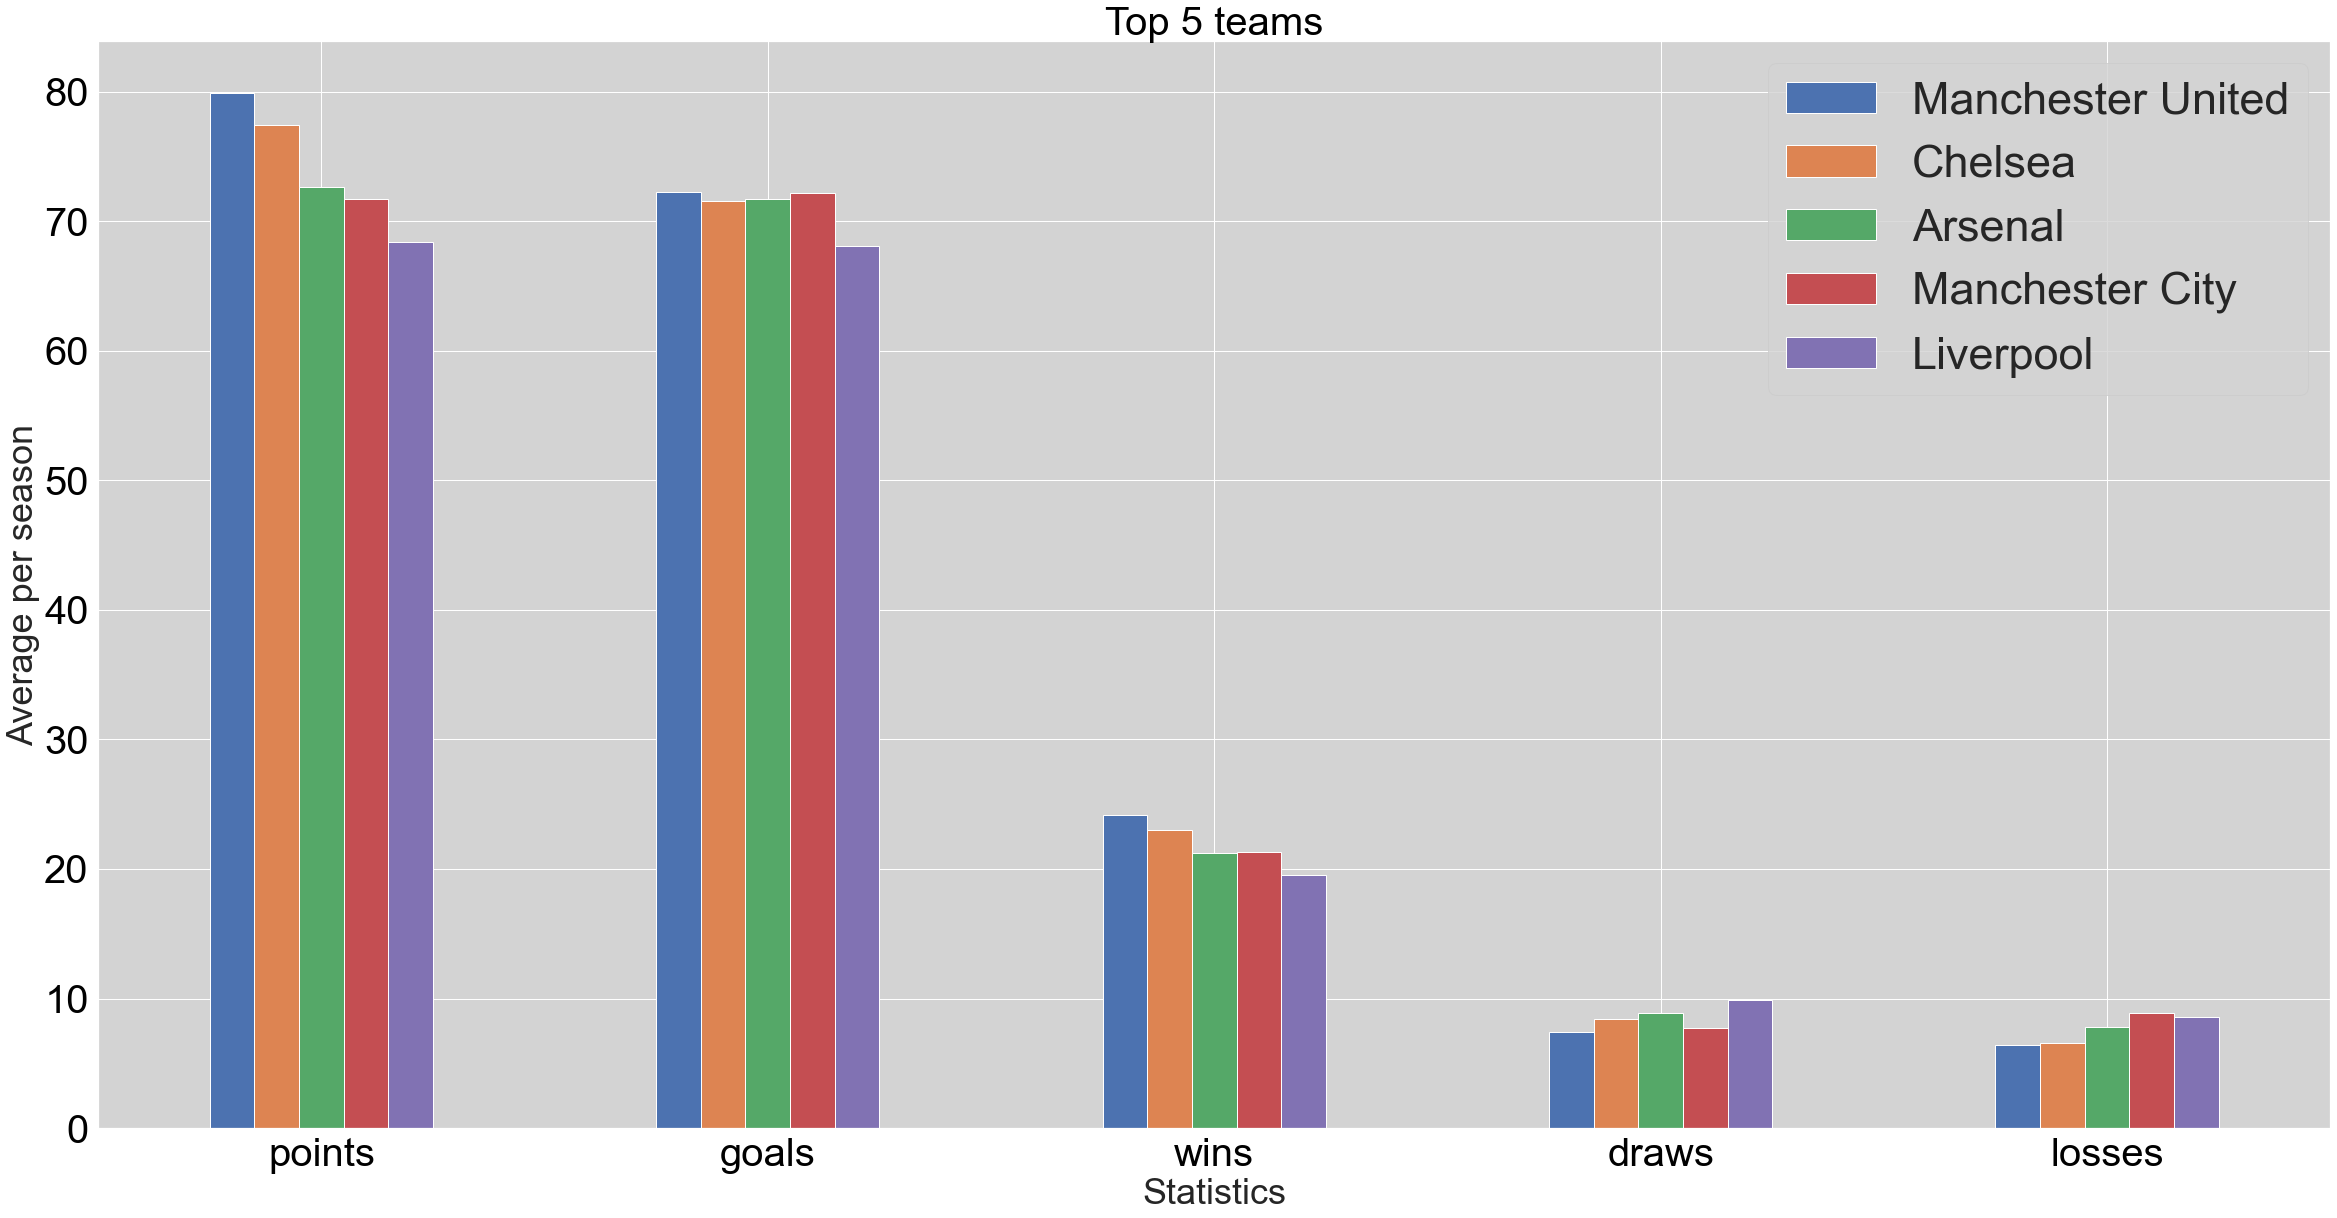

In [329]:
plt.rcParams.update({'axes.facecolor' : 'lightgrey'})
top5.plot.bar()
plt.title("Top 5 teams", fontsize=40, color = "Black")
plt.legend(facecolor ="white", edgecolor= "blue", fontsize=15)
plt.xticks(fontsize=40, color= "black", rotation = "horizontal")
plt.yticks(fontsize=40, color ="black")
plt.xlabel('Statistics')
plt.ylabel('Average per season')
plt.legend(fontsize=45)
plt.show()

The averages per season are in general very close between the top 5 teams. Similar to the observation above with the Manchester United, it's clear that goals have a positive correlation to points. MAn United edge out in all categories above which shows that in this period as a whole they have been the best, most consistent team in England